# Regression Metrics and Loss Functions

We've seen two examples of _loss functions_ earlier in the week in the context of regularization:
* The sum of squared errors:
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$
* Regularlized versions
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \theta_i}$$

In this lesson we're going to dig deeper into loss functions and their applications. Different loss functions are useful in different scenarios and there are two very popular loss functions that are used in conjuction with regression. In this case they are sometimes referred to as _regression metrics_.

The first is the _root mean squared error_ or _RMSE_ and it is the mean of the squared errors. If we $n$ regression points and their predictions, the [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is:

$$\text{RMSE} = \sqrt{\frac{\sum_{i}{\left(\hat{y}_i - y_i \right)^2}}{n}}$$

The second is the _mean absolute error_ or _MAE_, and it differs by use of an absolute value instead of a square. The [MAE](https://en.wikipedia.org/wiki/Average_absolute_deviation) is:

$$\text{MAE} = \frac{\sum_{i}{|\hat{y}_i - y_i |}}{n}$$

## Why have different regression metrics?

You might be thinking, _what's all the fuss about_? It turns out that there are lots of good reasons to use different loss functions. We've seen one -- regularization -- and now we'll consider the effects of outliers on these two metrics.

First let's try a very simplified statistics problem. Given a dataset, how can we summarize it with a single number? Do you know any ways?

This is equivalent to fitting a constant model to the data. It turns out that the _mean_ minimizes the RMSE and the _median_ minimizes the MAE. By analogy, when fitting a model, MAE is more tolerant to outliers. In other words, the degree of error of an outlier has a large impact when using RMSE versus the MAE. Since the choice of loss function affects model fit, it's important to consider how you want errors to impact your models.

**Summary**
* Use MAE when how far off an error is makes little difference
* Use RMSE when more extreme errors should have a large impact

Finally, note that linear regressions with MAE instead of RMSE are called _least absolute deviation_ regressions rather than least squares regressions.

### Bonus: Modes

It turns out the _mode_ minimizes the sum:
$$\frac{\sum_{i}{|\hat{y}_i - y_i |^{0}}}{n}$$
where $0^0=0$ and $x^0=1$ otherwise. Can you see why?


# Guided practice

Let's compute the RMSE and the MAE for a sample data set. Let's say we had a quadratic function that we fit a line to:

In [16]:
xs = [-1, 0, 1, 2, 3]
ys = [x*x + 1 for x in xs] # true values
predictions = [2*x for x in xs]
print ys
print predictions

[2, 1, 2, 5, 10]
[-2, 0, 2, 4, 6]


In [17]:
## MAE
sum([abs(ys[i] - predictions[i]) for i in range(len(ys))])/len(ys)  

2

In [18]:
## RMSE

import numpy as np
np.sqrt(sum([(predictions[i] - ys[i])**2 for i in range(len(ys))])/len(ys))

2.4494897427831779

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print "RMSE:", mean_squared_error(ys, predictions)**0.5
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 2.60768096208
MAE: 2.0


Now let's add an outlier to the data.

In [20]:
xs.append(4)
ys.append(17)
predictions.append(30)

print "RMSE:", mean_squared_error(ys, predictions)
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 33.8333333333
MAE: 3.83333333333


Notice that the impact on the RMSE was large, a factor of 8, versus the impact on the MAE with a factor of 2.5.

# Indepedent Practice

Let's explore two scenarios to obtain a better understanding of RMSE and MAE. First let's fit two models to the same set of data, the data above. To do the least mean absolute error we will use `statsmodels`.

In [21]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf

In [22]:
df = pd.DataFrame(np.array([xs, ys]).transpose(), columns=["x", "y"])
df.columns = ["x", "y"]
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.5556
Model:                       QuantReg   Bandwidth:                         nan
Method:                 Least Squares   Sparsity:                          nan
Date:                Wed, 22 Jun 2016   No. Observations:                    6
Time:                        11:09:11   Df Residuals:                        4
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0000        nan        nan        nan           nan       nan
x              3.0000        nan        nan        nan           nan       nan


This generated a fit of $y = 4 x + 1$. Let's see what a linear regression yields.

In [23]:
import statsmodels.api as sm


X = np.array(xs).transpose()
X = sm.add_constant(X)
# Fit and summarize OLS model
mod = sm.OLS(ys, X)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     16.88
Date:                Wed, 22 Jun 2016   Prob (F-statistic):             0.0148
Time:                        11:09:13   Log-Likelihood:                -13.998
No. Observations:                   6   AIC:                             32.00
Df Residuals:                       4   BIC:                             31.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.6667      1.660      1.004      0.3

This yielded a fit of $y = 3.125 x + 1.5625$.

### Exercise

Plot the data with both functions. Which do you think fits the data better?

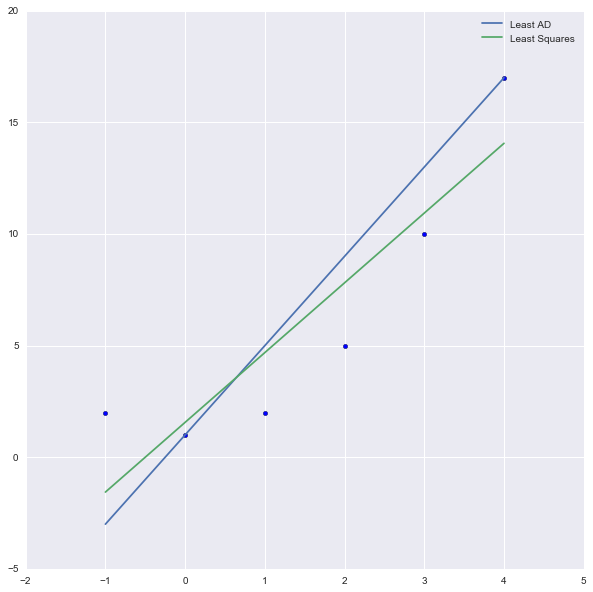

In [24]:
f1 = lambda x: 4*x + 1
f2 = lambda x: 3.125 * x + 1.5625
plt.scatter(xs, ys)
plt.plot(xs, map(f1, xs), label="Least AD")
plt.plot(xs, map(f2, xs), label="Least Squares")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

Finally, let's explore another scenario. Linear regression has five major assumptions, one of which is called _constant variance_ or _homoscedasticity_. It means that the errors are distributed with the same variance about the best fit line regardless of the value of the independent variables.

In practice this means that data with a persistant level of background noise can cause regression metrics to be poorly estimated. Let's take a look.

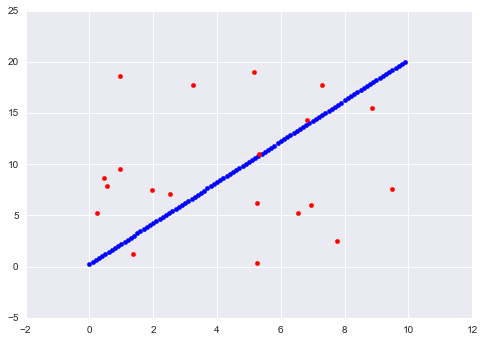

In [10]:
import random
from scipy.stats import norm
# Generate some data
xs = list(np.arange(0, 10, 0.1))
ys = [2*x + norm.pdf(0, 1) for x in xs]
# Add random background noise
xs2 = [10 * random.random() for i in range(20)]
ys2 = [20 * random.random() for i in range(20)]

# Plot the data sets
plt.scatter(xs, ys, color='b')
plt.scatter(xs2, ys2, color='r')
plt.show()

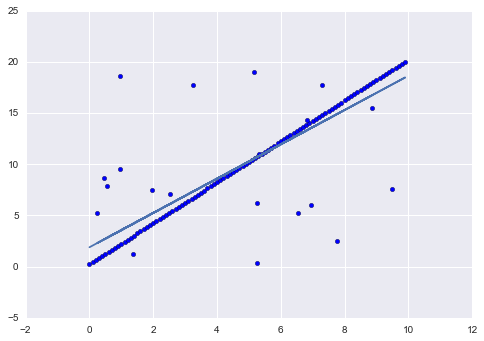

r^2: 0.715385330235
RMSE: 9.46417300683
MAE: 1.6666049581
Coefficients: [ 1.67645671] 1.89678185235


In [11]:
# Fit a line to the data
lm = linear_model.LinearRegression()

xs.extend(xs2)
ys.extend(ys2)

df = pd.DataFrame(np.array([xs, ys]).transpose(), columns=['x', 'y'])
X = df[['x']]
y = df['y']

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)

plt.show()
print "r^2:", model.score(X, y)
print "RMSE:", mean_squared_error(ys, predictions)
print "MAE:", mean_absolute_error(ys, predictions)
print "Coefficients:", model.coef_, model.intercept_

In [12]:
# Now try a MAE regression with statsmodels and plot it.
# You should see a much better fit.
df = pd.DataFrame(np.array([xs, ys]).transpose(), columns=["x", "y"])
df.columns = ["x", "y"]
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.7812
Model:                       QuantReg   Bandwidth:                   1.965e-07
Method:                 Least Squares   Sparsity:                    5.196e-07
Date:                Wed, 22 Jun 2016   No. Observations:                  120
Time:                        11:06:46   Df Residuals:                      118
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2420   4.61e-08   5.25e+06      0.000         0.242     0.242
x              2.0000   8.15e-09   2.45e+08      0.000         2.000     2.000


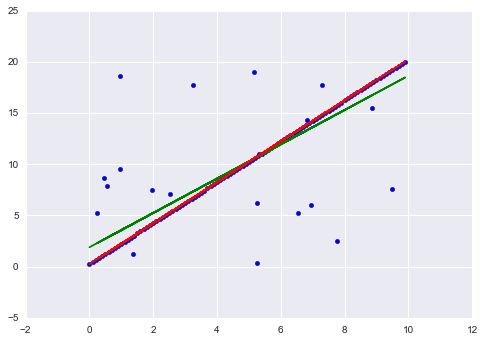

In [13]:
# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions, color='g')
plt.plot(X, [2*x + 0.2420 for x in xs], color='r')

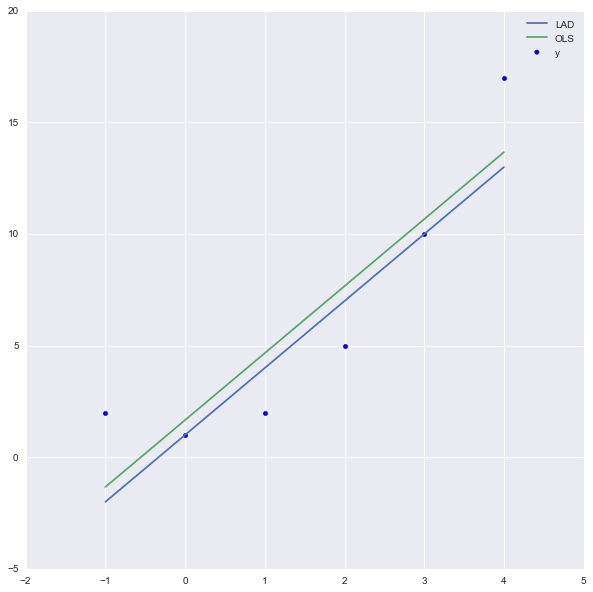

In [25]:
f1 = lambda x: 3*x + 1
f2 = lambda x: 3*x + 1.6667

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], map(f1, df['x']), label="LAD")
plt.plot(df['x'], map(f2, df['x']), label="OLS")

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()